# Configurando Dados

Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model

Configurando DataSet

In [ ]:
dataset = keras.datasets.fashion_mnist
((x_treino, y_treino), (x_teste, y_teste)) = dataset.load_data()
print(f'{len(x_treino)} imagens de treino\n {len(x_teste)} imagens de teste')

60000 imagens de treino
 10000 imagens de teste


Vizualizando imagens

Text(0.5, 1.0, '9')

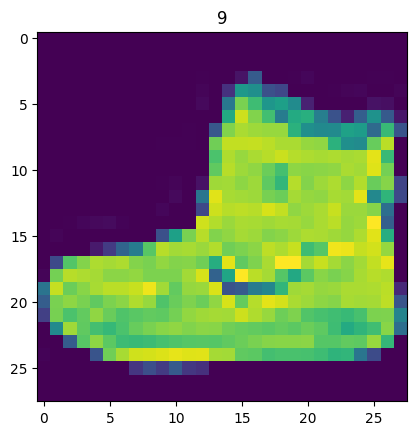

In [ ]:
plt.imshow(x_treino[0])
plt.title(y_treino[0])

Entendendo a Informação de Y

In [ ]:
total_de_classificacoes = y_treino.min() + y_treino.max() + 1
print(f'Total de Classificações: {total_de_classificacoes}')

Total de Classificações: 10


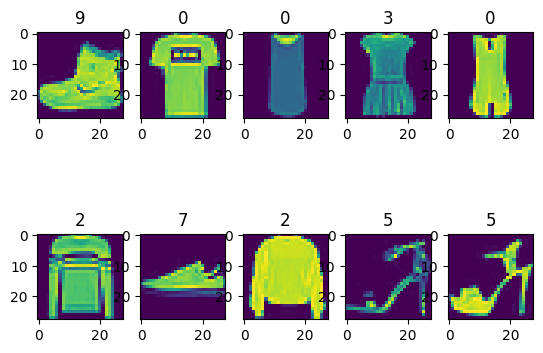

In [ ]:
for imagem in range(10):
    # Criando SubPlot para mostrar mais de uma imagem
    plt.subplot(2, 5, imagem+1)
    plt.imshow(x_treino[imagem])
    plt.title(y_treino[imagem])

**Documentação das classificações**

0. Camiseta
1. Calça
2. Camisa de Lã
3. Vestido
4. Casaco
5. Sandalia
6. Camisa
7. Tenis
8. Mochila
9. Bota


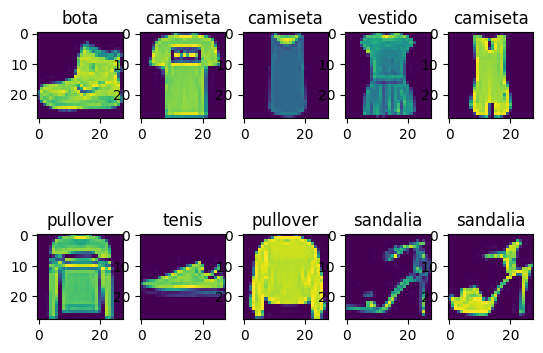

In [ ]:
y_names = ['camiseta','calça','pullover','vestido','casaco'
           ,'sandalia','camisa','tenis','mochila','bota']

for imagem in range(10):
    # Criando SubPlot para mostrar mais de uma imagem
    plt.subplot(2, 5, imagem+1)
    plt.imshow(x_treino[imagem])
    plt.title(y_names[y_treino[imagem]])

# Criando Model

Normalização - Diminuindo Gradação das imagens

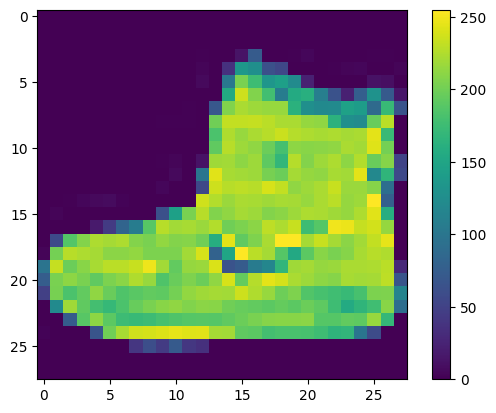

In [ ]:
# A imagem varia os pixels de 0 a 250
plt.imshow(x_treino[0])
plt.colorbar()

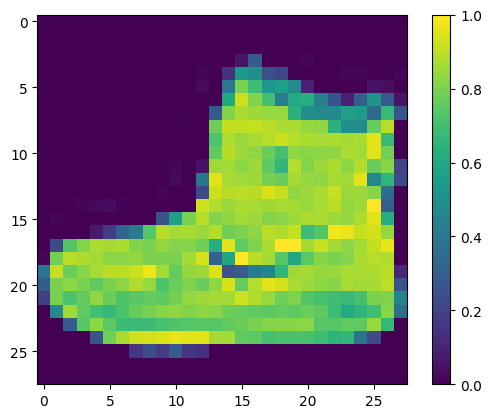

In [ ]:
# Diminuindo Gradiente - diminuiremos a perda de informações
x_treino = x_treino/255.0

# A imagem varia os pixels de 0 a 250
plt.imshow(x_treino[0])
plt.colorbar()

In [ ]:
# Criação de Model
# - entrada
# - processamento
# - saida

model = keras.Sequential([

    # Entrada:

        # Define o shape da entrada, px/px
    keras.layers.Flatten(input_shape=(28, 28)),

    # Processamento:

        # - função TensorFlow.NN.Relu
        #    - transforma negativos em zero, e mantem positivos
        #       Boa para esta situação pois "desenha" o contorno entre as imagens
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    #keras.layers.Dropout(0.2),

        # Mais uma camada de processamento para afunilação e assim dimnuir a diferença entre neuronios (255 -> 10)
    #keras.layers.Dense(128, activation=tensorflow.nn.relu),
    #keras.layers.Dropout(0.2),

    #keras.layers.Dense(64, activation=tensorflow.nn.relu),

        # Adormecendo parte das celulas
        # - Visando diminuir o OverFitting -> se acostumar aos dados de treino
    keras.layers.Dropout(0.2),

    # Saida:
        # Define Classificação na saída

        # - função TensorFlow.NN.SoftMax
        #    - Escolhe aquele com a maior probabilidade de ser
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

Compilando Modelo

In [ ]:
# Optimizer - irá otimizar o treino
# Loss (Perda de Informação)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
historico = model.fit(x_treino, y_treino, epochs=7, validation_split=0.2)

Epoch 1/7
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5261 - accuracy: 0.8126 - val_loss: 0.4124 - val_accuracy: 0.8487
Epoch 2/7
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3994 - accuracy: 0.8537 - val_loss: 0.3611 - val_accuracy: 0.8696
Epoch 3/7
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3612 - accuracy: 0.8670 - val_loss: 0.3505 - val_accuracy: 0.8748
Epoch 4/7
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3383 - accuracy: 0.8740 - val_loss: 0.3471 - val_accuracy: 0.8756
Epoch 5/7
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3236 - accuracy: 0.8814 - val_loss: 0.3308 - val_accuracy: 0.8804
Epoch 6/7
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3067 - accuracy: 0.8871 - val_loss: 0.3406 - val_accuracy: 0.8758
Epoch 7/7
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2971 - accuracy: 0.8900 - val_loss: 0.3201 - val_accuracy: 0.8

Salvando Modelo

In [ ]:
model.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

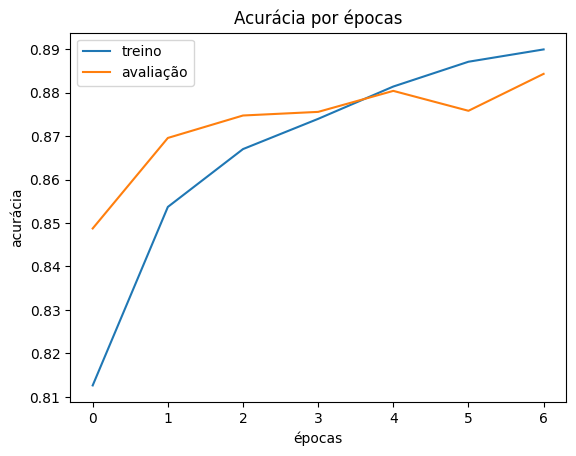

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','avaliação'])

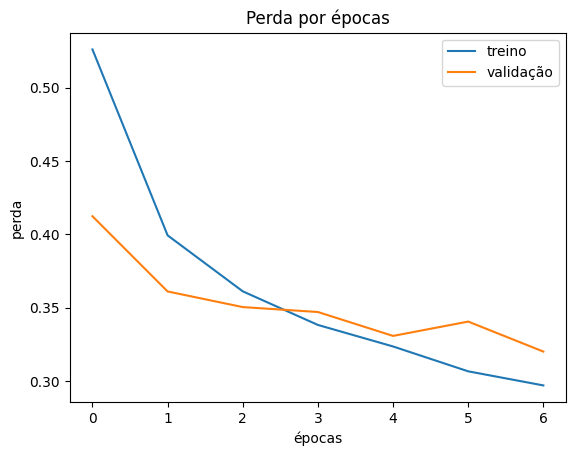

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino','validação'])

Testes

In [ ]:
i=2

y_pred = model.predict(x_teste)
print('Resultado Teste: ', np.argmax(y_pred[i]))
print('nº da imagem: ', y_teste[i])

teste_modelo_salvo = modelo_salvo.predict(x_teste)
print('Resultado Teste: ', np.argmax(y_pred[i]))
print('nº da imagem: ', y_teste[i])

313/313 [==============================] - 1s 2ms/step
Resultado Teste:  1
nº da imagem:  1
313/313 [==============================] - 1s 2ms/step
Resultado Teste:  1
nº da imagem:  1


In [ ]:
perda_teste, acc_teste = model.evaluate(x_teste, y_teste)
print('Perda do teste: ', perda_teste)
print('Acc do Teste: ', acc_teste)

313/313 [==============================] - 1s 2ms/step - loss: 53.1046 - accuracy: 0.8659
Perda do teste:  53.10456085205078
Acc do Teste:  0.8658999800682068
